# 👾 PixelCNN using Tensorflow distributions

In this notebook, we'll walk through the steps required to train your own PixelCNN on the fashion MNIST dataset using Tensorflow distributions

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/generative

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/generative


In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks
import tensorflow_probability as tfp

from notebooks.utils import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Parameters <a name="parameters"></a>

In [5]:
IMAGE_SIZE = 32
N_COMPONENTS = 5
EPOCHS = 10
BATCH_SIZE = 128

## 1. Prepare the data <a name="prepare"></a>

In [6]:
# Load the data
(x_train, _), (_, _) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
# Preprocess the data


def preprocess(imgs):
    imgs = np.expand_dims(imgs, -1)
    imgs = tf.image.resize(imgs, (IMAGE_SIZE, IMAGE_SIZE)).numpy()
    return imgs


input_data = preprocess(x_train)

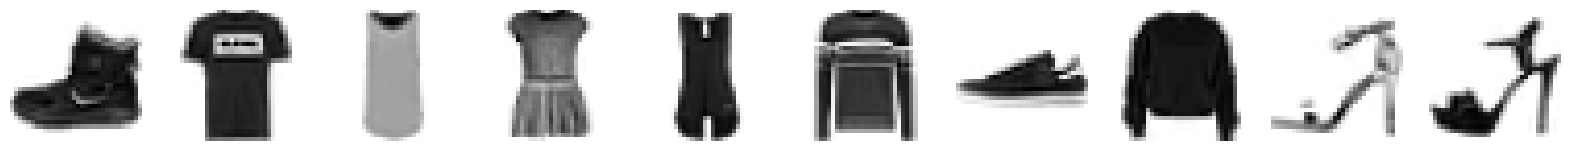

In [8]:
# Show some items of clothing from the training set
display(input_data)

## 2. Build the PixelCNN <a name="build"></a>

In [9]:
# Define a Pixel CNN network
dist = tfp.distributions.PixelCNN(
    image_shape=(IMAGE_SIZE, IMAGE_SIZE, 1),
    num_resnet=1,
    num_hierarchies=2,
    num_filters=32,
    num_logistic_mix=N_COMPONENTS,
    dropout_p=0.3,
)

# Define the model input
image_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

# Define the log likelihood for the loss fn
log_prob = dist.log_prob(image_input)

# Define the model
pixelcnn = models.Model(inputs=image_input, outputs=log_prob)
pixelcnn.add_loss(-tf.reduce_mean(log_prob))

## 3. Train the PixelCNN <a name="train"></a>

In [10]:
# Compile and train the model
pixelcnn.compile(
    optimizer=optimizers.Adam(0.001),
)

In [13]:
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")


class ImageGenerator(callbacks.Callback):
    def __init__(self, num_img):
        self.num_img = num_img

    def generate(self):
        return dist.sample(self.num_img).numpy()

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.generate()
        display(
            generated_images,
            n=self.num_img,
            save_to="./output/generated_img_%03d.png" % (epoch),
        )


img_generator_callback = ImageGenerator(num_img=2)

Layer _PixelCNNNetwork was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 2070.0110
Saved to ./output/generated_img_000.png


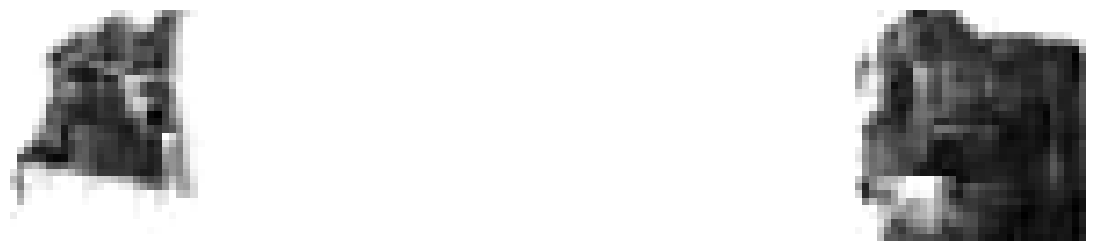

469/469 [==============================] - 198s 422ms/step - loss: 2070.0110
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 1990.4135
Saved to ./output/generated_img_001.png


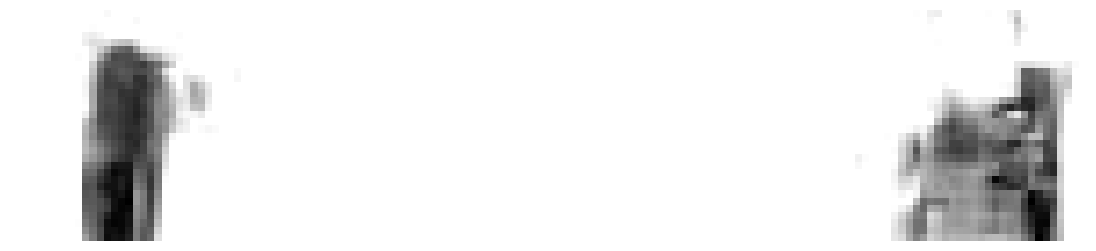

469/469 [==============================] - 198s 423ms/step - loss: 1990.4135
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 1941.4028
Saved to ./output/generated_img_002.png


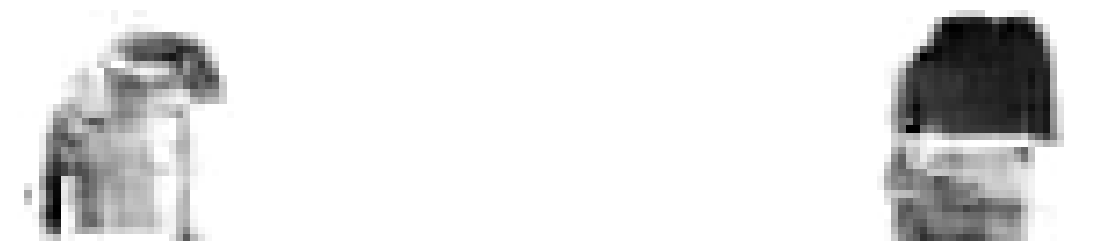

469/469 [==============================] - 198s 422ms/step - loss: 1941.4028
Epoch 4/10
469/469 [==============================] - ETA: 0s - loss: 1907.9883
Saved to ./output/generated_img_003.png


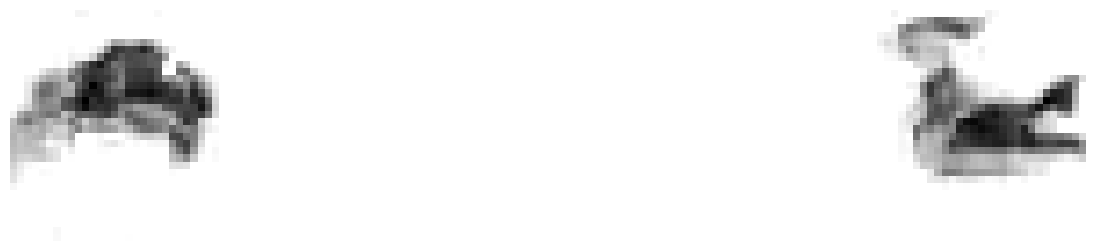

469/469 [==============================] - 200s 428ms/step - loss: 1907.9883
Epoch 5/10
469/469 [==============================] - ETA: 0s - loss: 1882.9846
Saved to ./output/generated_img_004.png


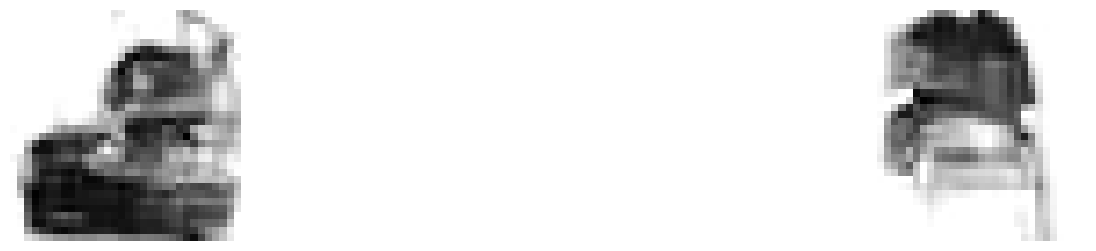

469/469 [==============================] - 199s 425ms/step - loss: 1882.9846
Epoch 6/10
469/469 [==============================] - ETA: 0s - loss: 1856.3817
Saved to ./output/generated_img_005.png


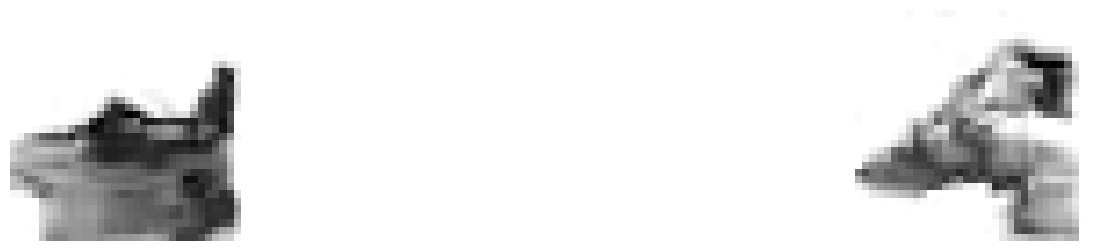

469/469 [==============================] - 201s 428ms/step - loss: 1856.3817
Epoch 7/10
469/469 [==============================] - ETA: 0s - loss: 1837.6511
Saved to ./output/generated_img_006.png


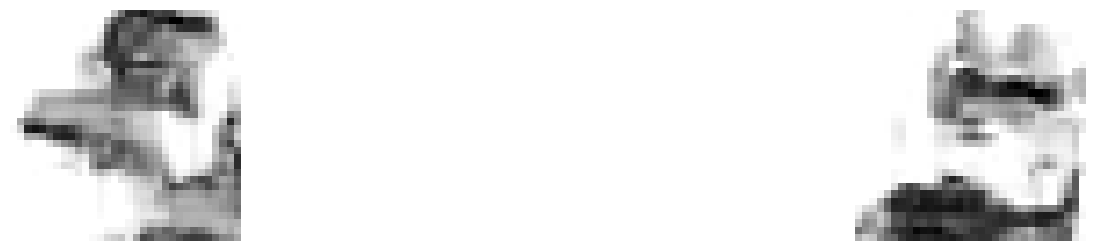

469/469 [==============================] - 199s 425ms/step - loss: 1837.6511
Epoch 8/10
469/469 [==============================] - ETA: 0s - loss: 1823.7528
Saved to ./output/generated_img_007.png


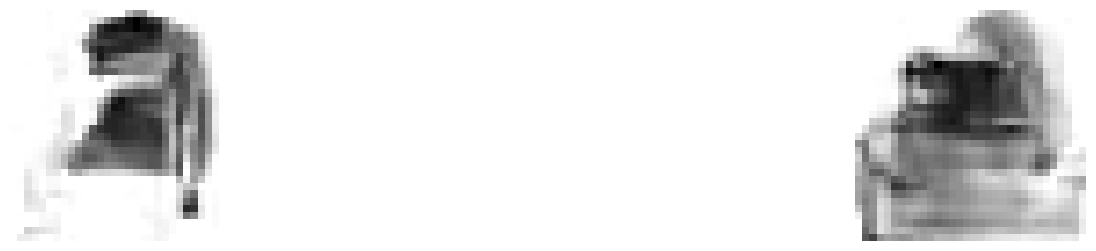

469/469 [==============================] - 200s 426ms/step - loss: 1823.7528
Epoch 9/10
469/469 [==============================] - ETA: 0s - loss: 1810.1018
Saved to ./output/generated_img_008.png


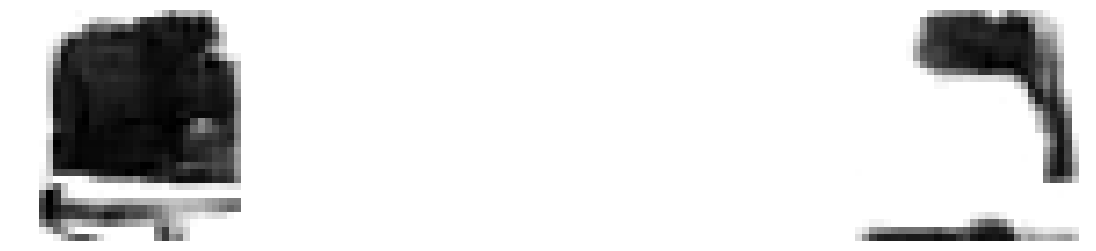

469/469 [==============================] - 198s 422ms/step - loss: 1810.1018
Epoch 10/10
469/469 [==============================] - ETA: 0s - loss: 1796.3116
Saved to ./output/generated_img_009.png


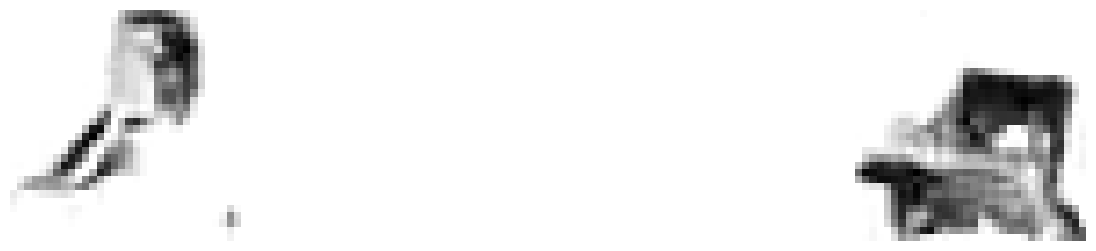

469/469 [==============================] - 200s 428ms/step - loss: 1796.3116


In [14]:
pixelcnn.fit(
    input_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=True,
    callbacks=[tensorboard_callback, img_generator_callback],
)

## 4. Generate images <a name="generate"></a>

In [15]:
generated_images = img_generator_callback.generate()

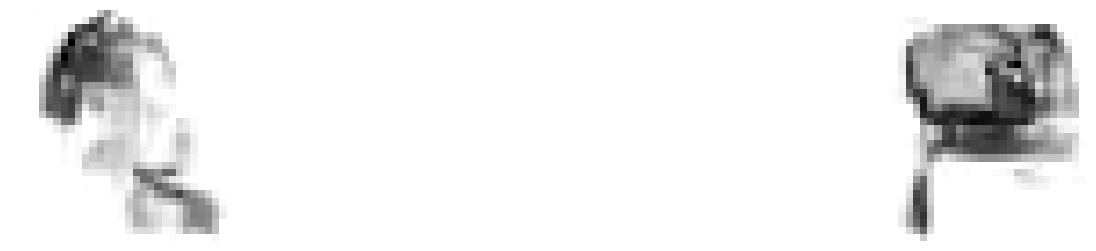

In [16]:
display(generated_images, n=img_generator_callback.num_img)